# Truncated Exponential

Here I test `RightTruncatedExponential` a distribution based on the `Exponential` distribution which gives support to $(0, r)$ for some $r \in \mathbb R_{>0}$.

The distribution supports:
* reparameterised samples
* closed form pdf, cdf, entropy and KL divergence




In [1]:
from sparsedists.exponential import RightTruncatedExponential
import torch
from torch.distributions.kl import kl_divergence
from sparsedists.utils import mc_entropy, mc_kl
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def plot_pdf(rates, upper=1., step=1e-3):
    plt.title('RightTruncatedExponential($\lambda$, %.1f).pdf' % upper)    
    x = np.arange(0. + step, 1., step)
    for rate in rates:
        p_rte = RightTruncatedExponential(torch.ones(1) * rate, upper)        
        y = np.exp(p_rte.log_prob(torch.from_numpy(x).float()).numpy())
        plt.plot(x, y)
    plt.legend(['$\lambda$=%.1f' % r for r in rates])
    
def plot_cdf(rates, upper=1., step=1e-3):
    plt.title('RightTruncatedExponential($\lambda$, %.1f).cdf' % upper)        
    x = np.arange(0. + step, 1., step)
    for rate in rates:
        p_rte = RightTruncatedExponential(torch.ones(1) * rate, upper)        
        y = p_rte.cdf(torch.from_numpy(x).float()).numpy()
        plt.plot(x, y)
    plt.legend(['$\lambda$=%.1f' % r for r in rates])
    
def plot_icdf(rates, upper=1., step=1e-3):
    plt.title('RightTruncatedExponential($\lambda$, %.1f).icdf' % upper)        
    x = np.arange(0. + step, 1., step)
    for rate in rates:
        p_rte = RightTruncatedExponential(torch.ones(1) * rate, upper)        
        y = p_rte.icdf(torch.from_numpy(x).float()).numpy()
        plt.plot(x, y)
    plt.legend(['$\lambda$=%.1f' % r for r in rates])    
    
    
def plot_normaliser(rates, upper=1., step=1e-3):
    plt.title('RightTruncatedExponential($\lambda$, %.1f).log_normaliser' % upper)
    for rate in rates:
        p_rte = RightTruncatedExponential(torch.ones(1) * rate, upper)        
        y = p_rte.normaliser.numpy()
        plt.plot(np.full_like(y, rate), np.log(y), 'o')
    plt.legend(['$\lambda$=%.1f' % r for r in rates]) 
    
def plot_samples(rates, upper=1., n=1000):
    plt.title('RightTruncatedExponential($\lambda$, %.1f).samples' % upper)    
    for rate in rates:
        p_rte = RightTruncatedExponential(torch.ones(1) * rate, upper)
        x = p_rte.rsample(sample_shape=torch.Size([n])).numpy()        
        plt.hist(x, bins=50, alpha=0.5)
    plt.legend(['$\lambda$=%.1f' % r for r in rates])
    
def plot_kl(rates, ref=1., upper=1., n=1000):
    
    p_ref = RightTruncatedExponential(torch.ones(1) * ref, upper)
    x = []
    y1 = []
    y2 = []
    
    for rate in rates:
        p_rte = RightTruncatedExponential(torch.ones(1) * rate, upper)
        x.append(rate)
        y1.append(torch.distributions.kl.kl_divergence(p_ref, p_rte).numpy())
        y2.append(torch.distributions.kl.kl_divergence(p_rte, p_ref).numpy())
    
    #plt.suptitle('KL(RTE($\lambda$, %.1f)||RTE(%.1f, %1.f)' % (upper, ref, upper))
    plt.plot(x, y1, 'x')
    #plt.suptitle('KL(RTE($\lambda$, %.1f)||RTE(%.1f, %1.f)' % (upper, ref, upper))
    plt.plot(x, y2, 'o', fillstyle='none')
    plt.legend(['KL(RTE(%.0e, %1.f)||RTE($\lambda$, %.1f))' % (ref, upper, upper),
                'KL(RTE($\lambda$, %.1f)||RTE(%.0e, %1.f))' % (upper, ref, upper)])    

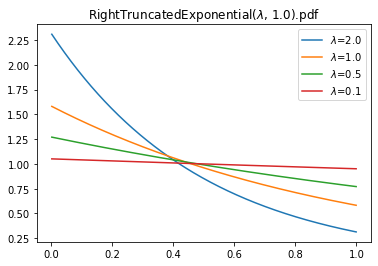

In [3]:
plot_pdf([2., 1., 0.5, 0.1])

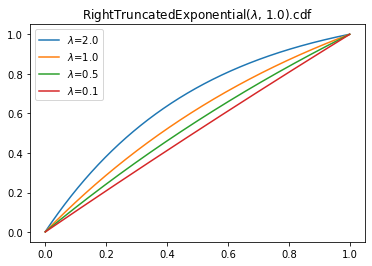

In [4]:
plot_cdf([2., 1., 0.5, 0.1])

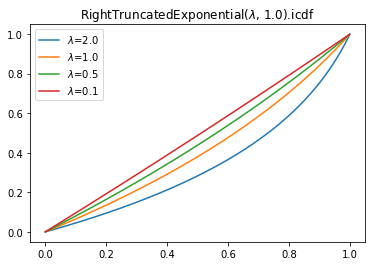

In [5]:
plot_icdf([2., 1., 0.5, 0.1])

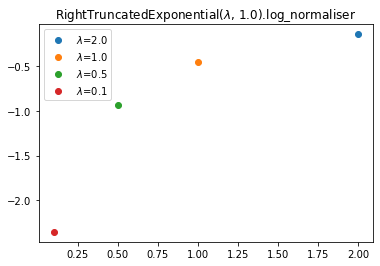

In [6]:
plot_normaliser([2., 1., 0.5, 0.1])

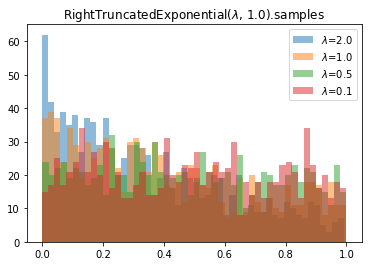

In [7]:
plot_samples([2., 1., 0.5, 0.1])

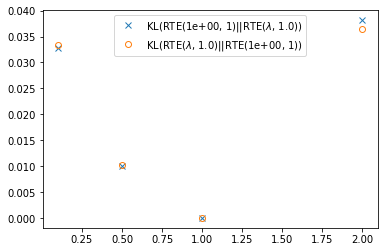

In [8]:
plot_kl([2., 1., 0.5, 0.1], ref=1.)

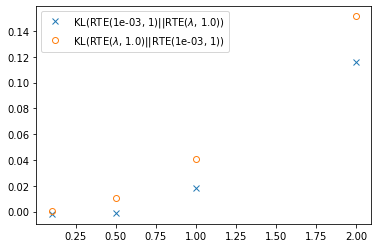

In [9]:
plot_kl([2., 1., 0.5, 0.1], ref=1e-3)

In [10]:
p = RightTruncatedExponential(torch.ones(1), upper=1.)

In [11]:
q = RightTruncatedExponential(torch.ones(1) * 0.5, upper=1.)

In [12]:
p.entropy()

tensor([-0.0407])

In [13]:
mc_entropy(p, 10000)

tensor([-0.0406])

In [14]:
mc_kl(p, q, n_samples=100000)

tensor([0.0103])

In [15]:
kl_divergence(p, q)

tensor([0.0101])